In [258]:
import pandas as pd
from scipy import stats
from scipy.stats import mstats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [259]:
data = pd.read_csv("C:/Users/linda/Downloads/Nono/bank-full.csv", delimiter = ';')

data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [260]:
data.rename(columns={'contact':'contact type'}, inplace= True)
data.rename(columns={'day':'last day of contact'}, inplace= True)
data.rename(columns={'month':'last month of contact'}, inplace= True)
data.rename(columns={'duration':'duration of call (seconds)'}, inplace= True)
data.rename(columns={'campaign':'times contacted this campaign'}, inplace= True)
data.rename(columns={'pdays':'days passed since last contact'}, inplace= True)
data.rename(columns={'previous':'times contacted before current campaign'}, inplace= True)
data.rename(columns={'poutcome':'previous campaign outcome'}, inplace= True)
data.rename(columns={'y':'outcome'}, inplace= True)

In [261]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact type,last day of contact,last month of contact,duration of call (seconds),times contacted this campaign,days passed since last contact,times contacted before current campaign,previous campaign outcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [262]:
data.describe()

,age,balance,last day of contact,duration of call (seconds),times contacted this campaign,days passed since last contact,times contacted before current campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [263]:
print(data.groupby(['days passed since last contact', 'outcome']).size())
data['days passed since last contact'].replace(-1, np.nan, inplace=True)
data.describe()

days passed since last contact  outcome
-1                              no         33570
                                yes         3384
 1                              no             9
                                yes            6
 2                              no            35
                                           ...  
 838                            no             1
 842                            yes            1
 850                            no             1
 854                            yes            1
 871                            no             1
Length: 914, dtype: int64


,age,balance,last day of contact,duration of call (seconds),times contacted this campaign,days passed since last contact,times contacted before current campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: xlabel='count', ylabel='outcome'>

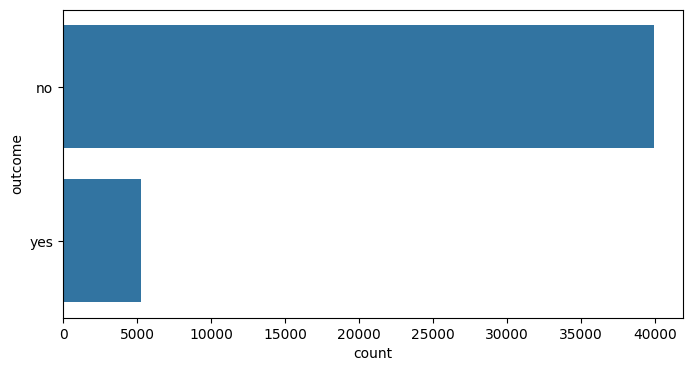

In [264]:
# Make figsize
plt.figure(figsize=(8,4))

# Bar plot by country
sns.countplot(y='outcome', data=data)

<Axes: xlabel='count', ylabel='marital'>

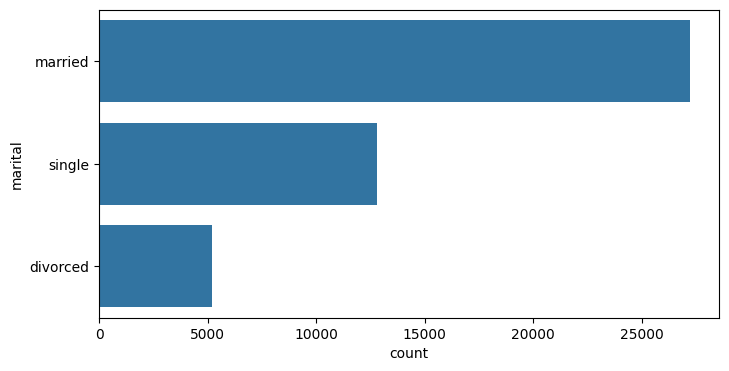

In [265]:
# Make figsize
plt.figure(figsize=(8,4))

# Bar plot by country
sns.countplot(y='marital', data=data)

<Axes: xlabel='count', ylabel='job'>

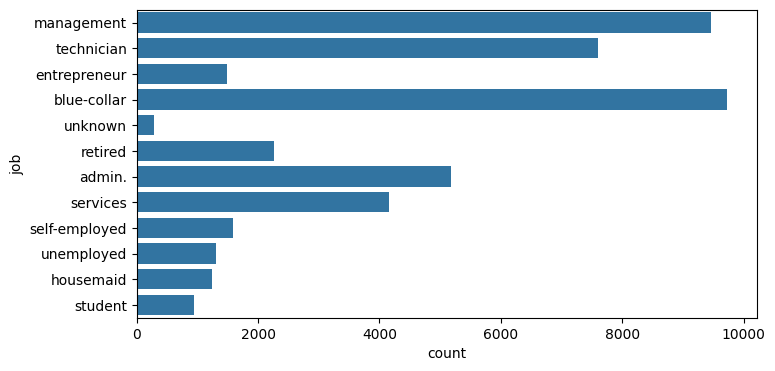

In [266]:
# Make figsize
plt.figure(figsize=(8,4))

# Bar plot by country
sns.countplot(y='job', data=data)

<Axes: xlabel='count', ylabel='age group'>

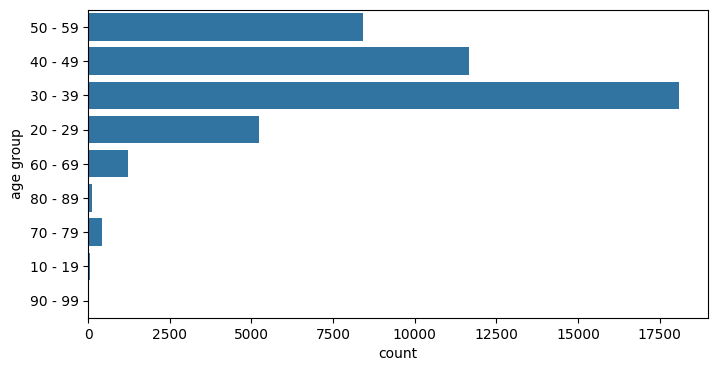

In [267]:
# Define a function to group ages
def age_grouping(age):
    lower_bound = (age // 10) * 10
    upper_bound = lower_bound + 9
    return f"{lower_bound} - {upper_bound}"

# Apply the function to create the age group column
data['age group'] = data['age'].apply(age_grouping)

# Display the resulting DataFrame
data.head(10)

# Make figsize
plt.figure(figsize=(8,4))

# Bar plot by country
sns.countplot(y='age group', data=data)

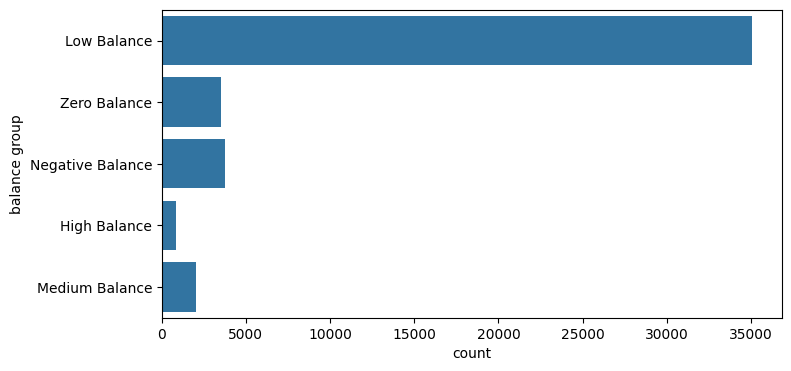

In [268]:
# Define a function to group balance into ranges
def balance_grouping(balance):
    if balance < 0:
        return "Negative Balance"
    elif balance == 0:
        return "Zero Balance"
    elif balance < 5000:
        return "Low Balance"
    elif balance < 10000:
        return "Medium Balance"
    else:
        return "High Balance"

# Apply the function to create the balance group column
data['balance group'] = data['balance'].apply(balance_grouping)

# Set figure size for the plot
plt.figure(figsize=(8, 4))

# Create a bar plot by balance group
sns.countplot(y='balance group', data=data)

# Show the plot
plt.show()

In [269]:
print(data.isnull().sum())

age                                            0
job                                            0
marital                                        0
education                                      0
default                                        0
balance                                        0
housing                                        0
loan                                           0
contact type                                   0
last day of contact                            0
last month of contact                          0
duration of call (seconds)                     0
times contacted this campaign                  0
days passed since last contact             36954
times contacted before current campaign        0
previous campaign outcome                      0
outcome                                        0
age group                                      0
balance group                                  0
dtype: int64


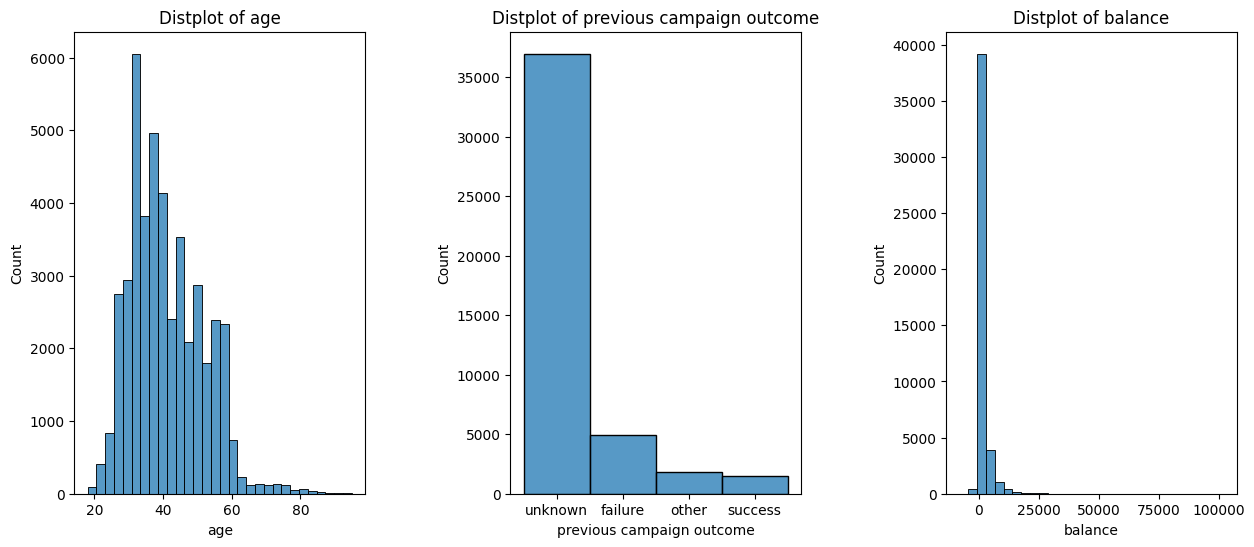

In [270]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['age', 'previous campaign outcome', 'balance']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(data[x], bins = 30)
    plt.title('Distplot of {}'.format(x))
plt.show()

Skewness of balance: 0.6931397093928041


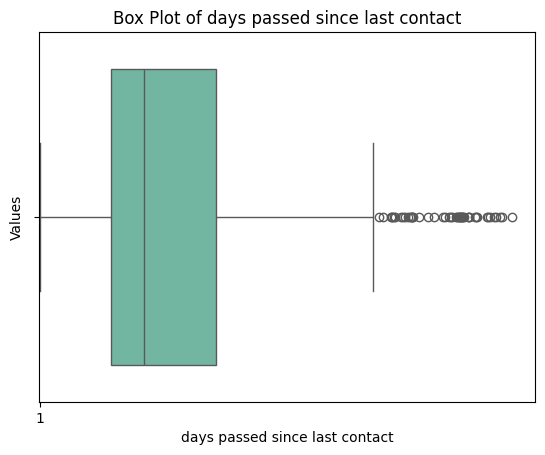

In [271]:
skewness = data['days passed since last contact'].skew()
print(f"Skewness of balance: {skewness}")
plt.boxplot(data['days passed since last contact'])
sns.boxplot(x=data['days passed since last contact'], palette='Set2')
plt.title('Box Plot of days passed since last contact')
plt.ylabel('Values')
plt.show()

0        0.487299
1        0.487299
2        0.487299
3        0.487299
4        0.487299
           ...   
45206    0.717119
45207    0.642027
45208    0.790092
45209    0.761204
45210    0.642027
Name: times contacted this campaign, Length: 45211, dtype: float64
Skewness of balance: 0.23094234176820008


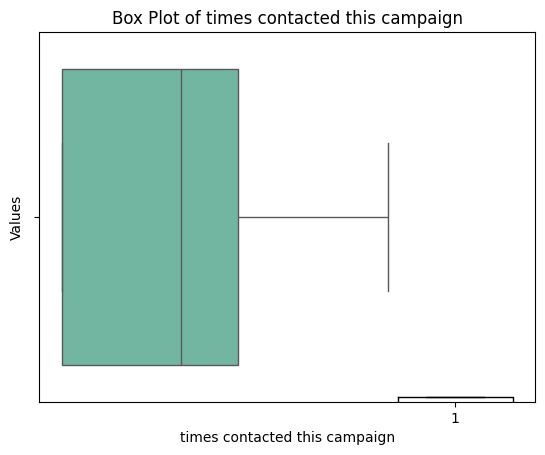

In [272]:
# Box-Cox transformation
data['times contacted this campaign'], fitted_lambda = stats.boxcox(data['times contacted this campaign'] + 1)  # Add 1 to avoid zeros
print(data['times contacted this campaign'])

skewness = data['times contacted this campaign'].skew()
print(f"Skewness of balance: {skewness}")
plt.boxplot(data['times contacted this campaign'])
sns.boxplot(x=data['times contacted this campaign'], palette='Set2')
plt.title('Box Plot of times contacted this campaign')
plt.ylabel('Values')
plt.show()

Skewness of balance: 8.360308326166324


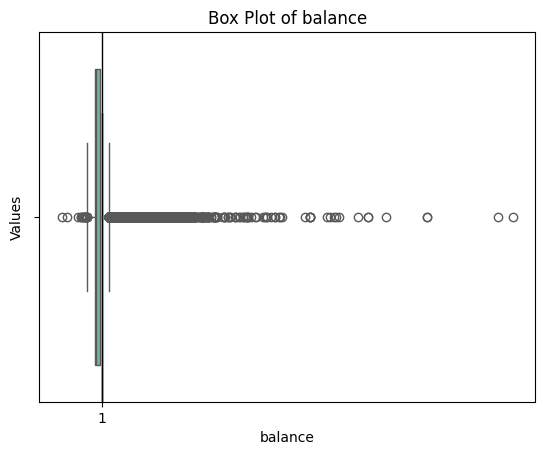

In [273]:
scaler = RobustScaler()
data['balance'] = scaler.fit_transform(data[['balance']])

skewness = data['balance'].skew()
print(f"Skewness of balance: {skewness}")
plt.boxplot(data['balance'])
sns.boxplot(x=data['balance'], palette='Set2')
plt.title('Box Plot of balance')
plt.ylabel('Values')
plt.show()

In [220]:
response_rate = data['outcome'].value_counts(normalize=True) * 100
print("Response Rate:\n", response_rate)


Response Rate:
 outcome
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [274]:
data['previous campaign outcome'].replace('unknown', np.nan, inplace=True)
print(data['previous campaign outcome'].value_counts())  # Counts for 'days passed since last contact'
print(data['education'].value_counts())  # Counts for 'days passed since last contact'

previous campaign outcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [275]:
features = ['age','job', 'marital', 'education', 'default', 'balance', 'housing', 'loan','times contacted this campaign', 'days passed since last contact', 'previous campaign outcome', 'outcome']
X = data[features]

In [276]:
# Define feature groups
categorical_features = ['job', 'marital', 'default', 'housing', 'loan', 'previous campaign outcome']
ordinal_features = ['education']  # Assuming it has an order (e.g., primary < secondary < tertiary)
numerical_features = ['age', 'balance', 'days passed since last contact', 'times contacted this campaign']

# Separate feature types from the dataset
X_categorical = X[categorical_features]
X_ordinal = X[ordinal_features]
X_numerical = X[numerical_features]
y_categorical = X['outcome']

# Handle Ordinal Encoding for 'education'
education_order = ['unknown', 'primary', 'secondary', 'tertiary']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
X_ordinal['education_encoded'] = ordinal_encoder.fit_transform(X_ordinal[['education']])

# One-Hot Encoding for categorical features
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

# Combine all features
X_final = pd.concat([
    X_categorical_encoded,        # Add one-hot encoded categorical features
    X_ordinal['education_encoded'],  # Add ordinal-encoded 'education'
    X_numerical# Add numerical features
], axis=1)

print(X_final)

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                False             False          False            True   
1                False             False          False           False   
2                False              True          False           False   
3                 True             False          False           False   
4                False             False          False           False   
...                ...               ...            ...             ...   
45206            False             False          False           False   
45207            False             False          False           False   
45208            False             False          False           False   
45209             True             False          False           False   
45210            False              True          False           False   

       job_retired  job_self-employed  job_services  job_student  \
0            False             

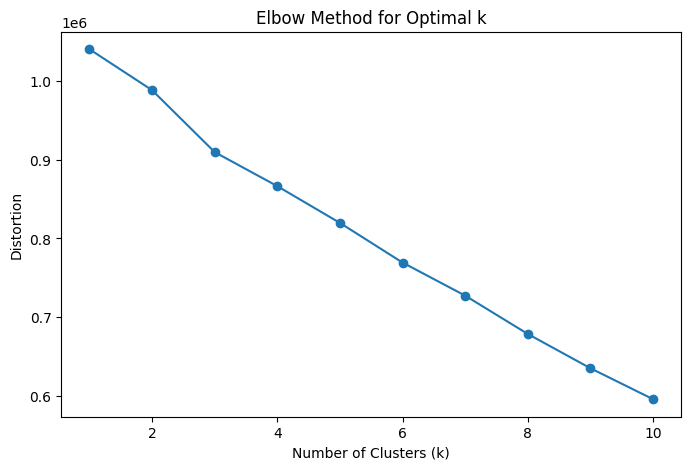

In [277]:
# Handle missing values if any
X_final.fillna(X_final.median(), inplace=True) 

X_final = X_final.apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_final)

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion")
plt.show()



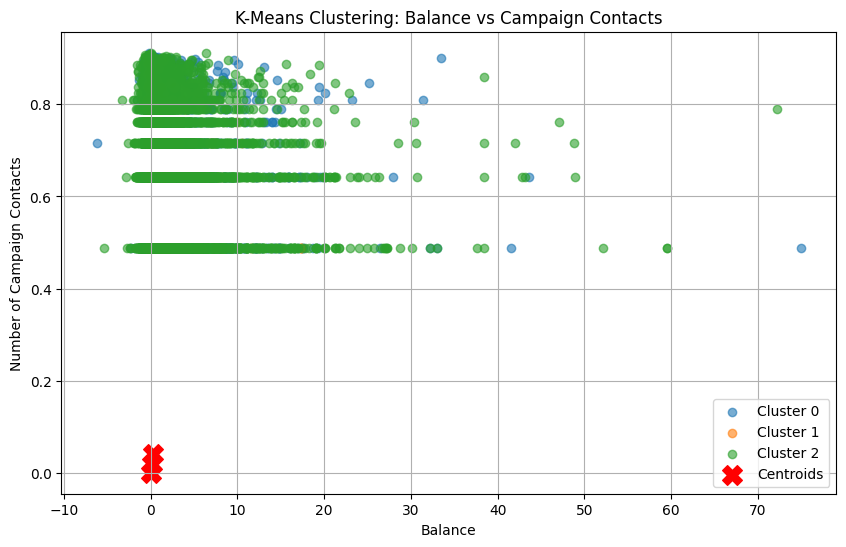

In [278]:
# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
X_final['cluster'] = kmeans.fit_predict(scaled_features)

# Access the cluster centroids
centroids = kmeans.cluster_centers_

# Transform centroids back to the original scale for interpretation
centroids_original_scale = scaler.inverse_transform(centroids)

# Scatter plot of clusters using two features
plt.figure(figsize=(10, 6))

for cluster in range(3):  # Adjust if you change n_clusters
    cluster_data = X_final[X_final['cluster'] == cluster]
    plt.scatter(cluster_data['balance'], cluster_data['times contacted this campaign'], label=f'Cluster {cluster}', alpha=0.6)

# Plot centroids
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add plot details
plt.title('K-Means Clustering: Balance vs Campaign Contacts')
plt.xlabel('Balance')
plt.ylabel('Number of Campaign Contacts')
plt.legend()
plt.grid()
plt.show()

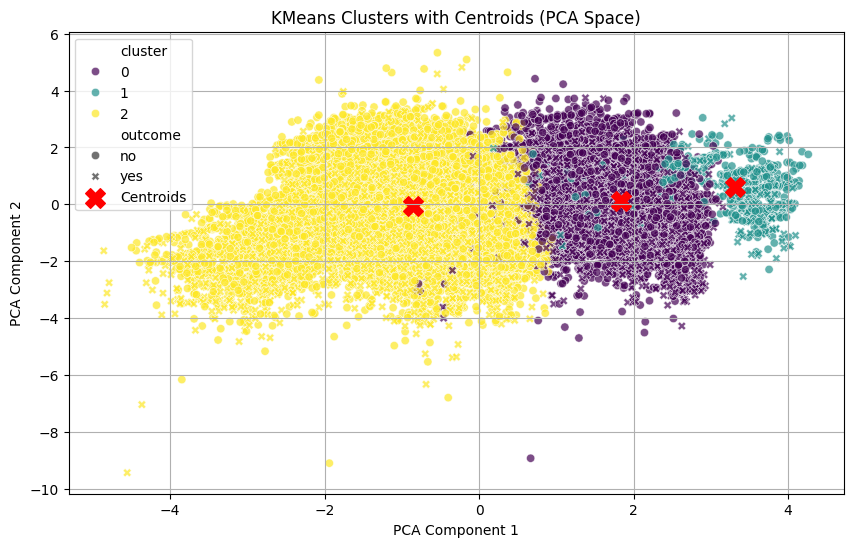

Centroids in PCA space:
Cluster 0: PCA1=1.83, PCA2=0.12
Cluster 1: PCA1=3.32, PCA2=0.59
Cluster 2: PCA1=-0.85, PCA2=-0.07


In [279]:
# Step 1: Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Convert PCA results to a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['pca1', 'pca2'])

# Step 2: Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the PCA DataFrame
X_pca_df['cluster'] = clusters

# Optional: Add original labels or outcomes for analysis
X_pca_df['outcome'] = X['outcome']  # Replace 'outcome' with your target column if applicable

# Step 3: Transform cluster centroids to PCA space
centroids = kmeans.cluster_centers_  # Centroids in original space
centroids_pca = pca.transform(centroids)  # Transform to PCA space

# Step 4: Visualise clusters with centroids
plt.figure(figsize=(10, 6))

# Scatter plot of PCA components with cluster hue
sns.scatterplot(data=X_pca_df, x='pca1', y='pca2', hue='cluster', palette='viridis', style='outcome', alpha=0.7)

# Overlay cluster centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')

# Plot details
plt.title('KMeans Clusters with Centroids (PCA Space)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

# Step 5: Analyse centroids
print("Centroids in PCA space:")
for i, (pca1, pca2) in enumerate(centroids_pca):
    print(f"Cluster {i}: PCA1={pca1:.2f}, PCA2={pca2:.2f}")

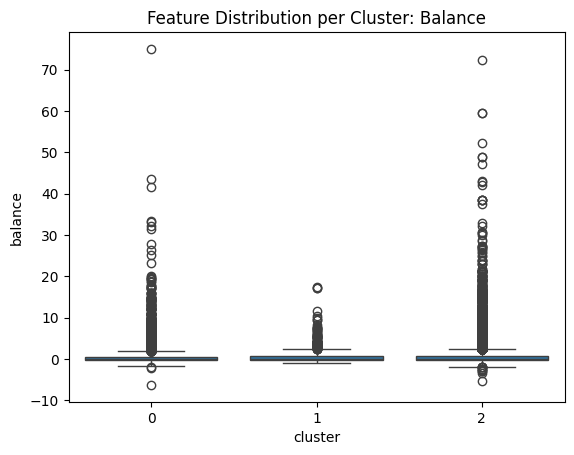

In [280]:
# Add cluster labels to the dataframe
X_final['cluster'] = clusters
X_final['outcome'] = X['outcome']

# Plot the feature distribution for each cluster
sns.boxplot(x='cluster', y='balance', data=X_final)
plt.title('Feature Distribution per Cluster: Balance')
plt.show()

In [281]:
# Encode target variable 'outcome' ('yes' as 1, 'no' as 0)
X_final['outcome_encoded'] = X_final['outcome'].map({'yes': 1, 'no': 0})

# Check how clusters relate to the outcome (outcome)
cluster_analysis = X_final.groupby(['cluster', 'outcome_encoded']).size().unstack(fill_value=0)
print(cluster_analysis)

# Calculate the percentage of subscription outcome ('yes'/'no') per cluster
cluster_analysis_percentage = cluster_analysis.div(cluster_analysis.sum(axis=1), axis=0) * 100
print(cluster_analysis_percentage)

outcome_encoded      0     1
cluster                     
0                11094  1766
1                  669   269
2                28159  3254
outcome_encoded          0          1
cluster                              
0                86.267496  13.732504
1                71.321962  28.678038
2                89.641231  10.358769


In [282]:
# Encode target variable 'outcome' ('yes' as 1, 'no' as 0)
X_final['outcome_encoded'] = X_final['outcome'].map({'yes': 1, 'no': 0})

# Define the feature matrix A and target vector y
A = X_final.drop(columns=['outcome', 'outcome_encoded', 'cluster'])  # Drop unnecessary columns
y = X_final['outcome_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(A, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

X_final = X_final.drop(columns=['outcome'])
print(X_final.dtypes)

Accuracy: 0.8925833087584784
job_blue-collar                         bool
job_entrepreneur                        bool
job_housemaid                           bool
job_management                          bool
job_retired                             bool
job_self-employed                       bool
job_services                            bool
job_student                             bool
job_technician                          bool
job_unemployed                          bool
job_unknown                             bool
marital_married                         bool
marital_single                          bool
default_yes                             bool
housing_yes                             bool
loan_yes                                bool
previous campaign outcome_other         bool
previous campaign outcome_success       bool
education_encoded                    float64
age                                    int64
balance                              float64
days passed since last con

In [283]:
# Create binary indicators for each cluster
clusters = pd.get_dummies(X_final['cluster'], prefix='cluster')

# Compute correlations of each feature with each cluster
cluster_correlations = {}

for cluster in clusters.columns:
    cluster_name = cluster
    cluster_binary = clusters[cluster]
    correlations = X_final.drop(columns='cluster').apply(lambda x: x.corr(cluster_binary))
    cluster_correlations[cluster_name] = correlations

# Combine the correlations into a single DataFrame
cluster_correlation_df = pd.DataFrame(cluster_correlations)
print(cluster_correlation_df)


                                   cluster_0  cluster_1  cluster_2
job_blue-collar                    -0.088894  -0.076234   0.110688
job_entrepreneur                   -0.050297  -0.026843   0.057585
job_housemaid                      -0.062952  -0.024443   0.069241
job_management                      0.077232  -0.074864  -0.052493
job_retired                        -0.123180  -0.033420   0.131027
job_self-employed                   0.005037  -0.027690   0.003636
job_services                        0.020608  -0.046299  -0.005859
job_student                        -0.091772   1.000000  -0.219623
job_technician                      0.100845  -0.065415  -0.078552
job_unemployed                      0.016226  -0.025075  -0.008135
job_unknown                        -0.007345  -0.011655   0.010804
marital_married                    -0.775305  -0.161871   0.809686
marital_single                      0.899211   0.211073  -0.946309
default_yes                         0.013700  -0.016222  -0.00

outcome_encoded      0     1
cluster                     
0                11094  1766
1                  669   269
2                28159  3254
outcome_encoded         0         1
cluster                            
0                0.862675  0.137325
1                0.713220  0.286780
2                0.896412  0.103588

Correlations for cluster_2:
job_blue-collar                     -0.073692
job_entrepreneur                    -0.017750
job_housemaid                       -0.016295
job_management                       0.034095
job_retired                          0.115983
job_self-employed                   -0.009664
job_services                        -0.027394
job_student                               NaN
job_technician                      -0.004830
job_unemployed                       0.018488
job_unknown                         -0.000733
marital_married                     -0.020898
marital_single                       0.008492
default_yes                         -0.022642
ho

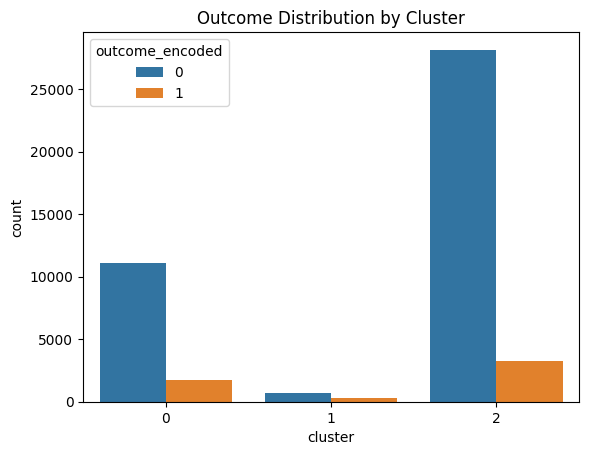

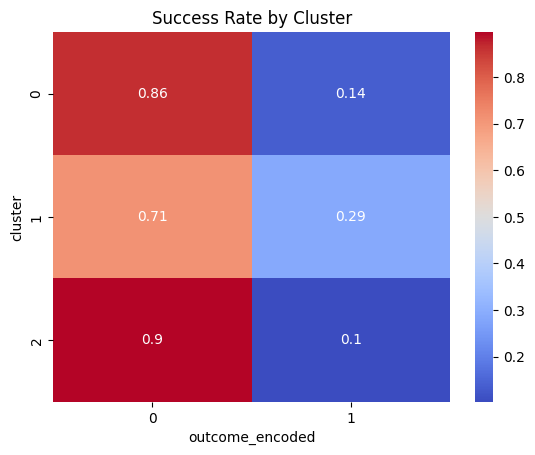

In [284]:
cluster_outcome_stats = X_final.groupby(['cluster', 'outcome_encoded']).size().unstack()
print(cluster_outcome_stats)

cluster_success_rate = cluster_outcome_stats.div(cluster_outcome_stats.sum(axis=1), axis=0)
print(cluster_success_rate)

correlations_by_cluster = {}
for cluster in X_final['cluster'].unique():
    cluster_data = X_final[X_final['cluster'] == cluster]
    correlations_by_cluster[f'cluster_{cluster}'] = cluster_data.drop(columns='cluster').apply(
        lambda x: x.corr(cluster_data['outcome_encoded'])
    )
for cluster, correlations in correlations_by_cluster.items():
    print(f"\nCorrelations for {cluster}:\n{correlations}")

sns.countplot(data=X_final, x='cluster', hue='outcome_encoded')
plt.title('Outcome Distribution by Cluster')
plt.show()

sns.heatmap(cluster_success_rate, annot=True, cmap='coolwarm')
plt.title('Success Rate by Cluster')
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.67      0.18      0.28      1598

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564

[[11826   140]
 [ 1317   281]]


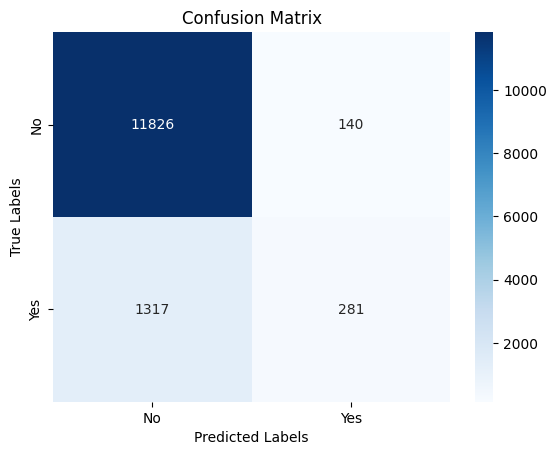

In [285]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


                              Feature  Importance
20                            balance    0.259376
19                                age    0.215213
21     days passed since last contact    0.135597
17  previous campaign outcome_success    0.125304
22      times contacted this campaign    0.070571
18                  education_encoded    0.034490
14                        housing_yes    0.033959
15                           loan_yes    0.013855
11                    marital_married    0.013291
8                      job_technician    0.012294
12                     marital_single    0.011278
3                      job_management    0.011277
0                     job_blue-collar    0.009447
16    previous campaign outcome_other    0.009082
6                        job_services    0.007417
4                         job_retired    0.007152
7                         job_student    0.006712
9                      job_unemployed    0.005874
5                   job_self-employed    0.005705


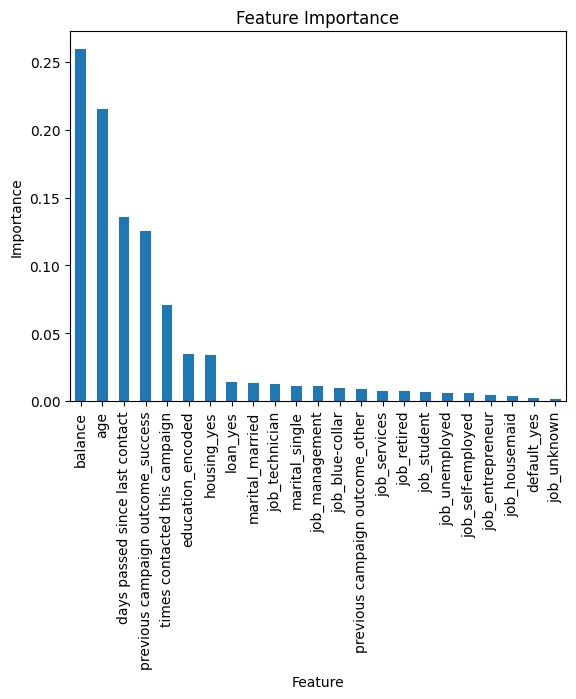

In [286]:
# Get feature importance
feature_importances = clf.feature_importances_

# Create a DataFrame to view feature importances
importance_data = pd.DataFrame({
    'Feature': A.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_data)

# Plot
importance_data.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()


In [902]:
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to test
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate the best model
best_clf = random_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print(f'Accuracy with best parameters: {accuracy_score(y_test, y_pred_best)}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
Accuracy with best parameters: 0.8934680035387791


In [903]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(clf, A, y, cv=5)

# Print average cross-validation score
print(f"Average Cross-Validation Score: {cv_scores.mean()}")

Average Cross-Validation Score: 0.8533757353809321
